In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import date
import matplotlib.dates as mdates

#Lendo os CSV dos dados de produção EMBRAPA
df = pd.read_csv("2022.csv", sep=";")
pd.set_option('display.max_columns', 56)
#obs: o arquvio 2022 na real já compreende todos os anos
pd.options.display.float_format = '{:,.2f}'.format
#pd.options.display.float_format = '${:,.2f}'.format para colocar cifrão em frente

#Lendo os CSV dos dados climáticos INMET
alegrete = pd.read_csv("alegrete.csv", skiprows=10, sep=";", decimal=",")
bage = pd.read_csv("bage.csv", skiprows=10, sep=";",decimal=",")
bento = pd.read_csv("bento.csv", skiprows=10, sep=";",decimal=",")
erechim = pd.read_csv("erechim.csv", skiprows=10, sep=";",decimal=",")
rio_grande = pd.read_csv("rio grande.csv", skiprows=10, sep=";",decimal=",")


Eu decidi não tratar os NaN porque da primeira vez, eu usei o comando .fillna(0) e os valores nulos passaram a aparecer nos gráficos, o que não foi legal. Então, deixando-os nulos eles não apareceram diretamente e não atrapalharam a análise :)

In [37]:
#df = df.set_index('id')
df.shape

(51, 55)

In [38]:
df.head(10)

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,211252982,130308185,186129728,234754564,120261544,177680331,275338955,157711522,150467184,244791058,181801961,210548199,126768254,163248419,171754995,202073263,214788304,152917771,182816047,150814943,226520776,273025576,228932458,259589740,202545724,313962284,226080432,185100887,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,154736439,101659755,134156175,183349460,87080528,119615028,216732390,118766694,97841160,173747942,136931173,154359897,90320836,118638894,125172218,161479717,167174017,115896909,116458841,102127865,168149414,208242670,175267437,215892333,155513687,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,7146395,5363452,12547739,15782499,12191896,19502230,23010666,16872183,27497857,32660045,24603265,33512030,25046588,25446255,31986075,28291853,15472732,24073622,41842945,32140249,42528150,44902276,44322836,35329657,40861639,51719967,39212146,31738390,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,49370148,23284978,39425814,35622605,20989120,38563073,35595899,22072645,25128167,38383071,20267523,22676272,11400830,19163270,14596702,12301693,32141555,12947240,24514261,16546829,15843212,19880630,9342185,8367750,6170398,8069892,6169620,3809942,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,46129710,31740663,49348047,57453581,40616812,48289279,67035393,48559180,47301266,76560765,72772144,73689124,45519167,52612778,53054225,58733741,47126229,45325058,46988414,33898630,45830497,56209739,34159277,31655226,29551457,42902608,45453898,32168977,43176484,47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796
5,6,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,15000671,14356453,9296741,16036963,19987588,14340514,15777602,19347979,12282967,10920073,18690518,16140751,17750504,12001895,13449911,12119485,15646861,11924291,12819866,12590647,8716140,14640657,18545613,13587683,13619033,15357576,23062182,25409805,18868108,24786071,27583032,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
6,7,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,17640081,25727132,19326572,27528276,34423412,24164361,30395959,44679484,34794145,35432544,56441847,54983093,52080420,33307472,38856367,40415898,42419680,34209738,31893892,33792167,24384090,30674840,36955126,20393594,17911689,14058481,19803647,20012363,13249969,17598428,18812571,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
7,8,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,4723982,4110181,6046125,3117350,5782808,3042581,2111937,2115718,3007930,1482068,948649,1428400,1648300,3858200,209800,306500,518842,667200,992200,611300,605600,798

In [39]:
df.columns
#df = df[df.columns[]] #só está displaying o id, os produtos e 2007-2022
#df.head()


Index(['id', 'produto', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [40]:
df = df.iloc[:,39:] # para selecionar somente a partir de 2007, calculei 54-15 anos = 39. Para o índice iniciar em 39, coloquei 39 no iloc.

In [41]:
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,43176484,47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [42]:
df = df.T

In [43]:
df = df.drop([0,4], axis=1)

In [44]:
df = df.drop(df.columns[6:54], axis=1)
#mantendo somente vinhos de mesa e vinhos finos. Tinto, branco e rosado

In [45]:
df = df.rename(columns={1: "tinto_mesa", 2: "branco_mesa", 3: "rosado_mesa", 5:"tinto_fino", 6:"branco_fino", 7:"rosado_fino"})

In [46]:
#retirando uma coluna que veio automaticamente do csv

alegrete.drop("Unnamed: 3", axis=1, inplace=True)
bage.drop("Unnamed: 3", axis=1, inplace=True)
bento.drop("Unnamed: 3", axis=1, inplace=True)
erechim.drop("Unnamed: 3", axis=1, inplace=True)
rio_grande.drop("Unnamed: 3", axis=1, inplace=True)

In [47]:

#renomeando as colunas para boas práticas
alegrete = alegrete.rename(columns={"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)":"chuva","	Data Medicao":"data", "TEMPERATURA MEDIA, MENSAL (AUT)(°C)":"temperatura"})

bage = bage.rename(columns={"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)":"chuva","	Data Medicao":"data", "TEMPERATURA MEDIA, MENSAL (AUT)(°C)":"temperatura"})

bento = bento.rename(columns={"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)":"chuva","	Data Medicao":"data", "TEMPERATURA MEDIA, MENSAL (AUT)(°C)":"temperatura"})

erechim = erechim.rename(columns={"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)":"chuva","	Data Medicao":"data", "TEMPERATURA MEDIA, MENSAL (AUT)(°C)":"temperatura"})

rio_grande = rio_grande.rename(columns={"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)":"chuva","	Data Medicao":"data", "TEMPERATURA MEDIA, MENSAL (AUT)(°C)":"temperatura"})


Notei que os dados climáticos são mensais, porém os de produção são anuais...

Vamos plotar os gráficos de vinhos de mesa, e separadamente os de vinhos finos.

In [48]:
df.index #os anos já são o index.

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

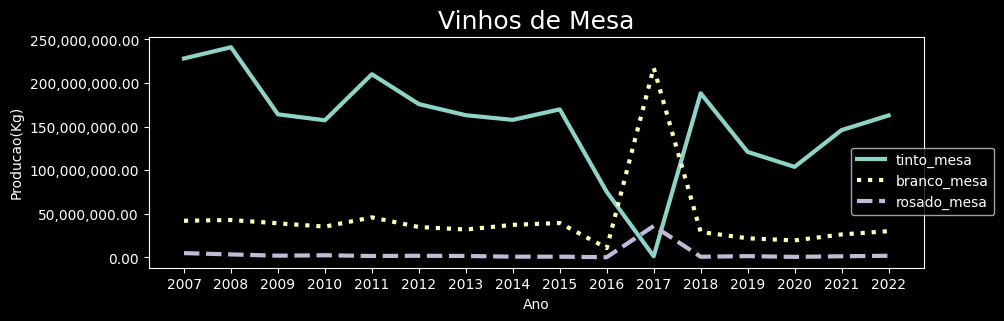

In [49]:
plt.figure(figsize=(10,3))
axis = sns.lineplot(y="tinto_mesa", x=df.index, data=df, label="tinto_mesa",  linewidth = 3)
sns.lineplot(y="branco_mesa", x=df.index, data=df, label="branco_mesa",  linewidth = 3, linestyle=":")
sns.lineplot(y="rosado_mesa", x=df.index, data=df, label="rosado_mesa",  linewidth = 3, linestyle="--")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.style.use('dark_background')

plt.title("Vinhos de Mesa", loc="center", fontsize=18)
plt.xlabel("Ano")
plt.ylabel("Producao(Kg)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.55))
plt.show()

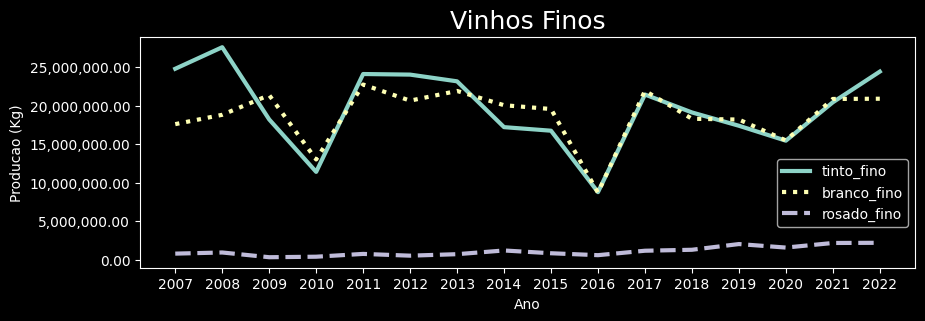

In [50]:
plt.figure(figsize=(10,3))
axis = sns.lineplot(y="tinto_fino", x=df.index, data=df, label="tinto_fino", linewidth=3)
sns.lineplot(y="branco_fino", x=df.index, data=df, label="branco_fino", linewidth = 3, linestyle=":")
sns.lineplot(y="rosado_fino", x=df.index, data=df, label="rosado_fino", linewidth = 3, linestyle="--")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.style.use('dark_background') #se quiser fundo branco, é só comentar essa parte
plt.title("Vinhos Finos", loc="center", fontsize=18)
plt.xlabel("Ano")
plt.ylabel("Producao (Kg)")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.show()

In [51]:
alegrete = alegrete.rename(columns={"Data Medicao":"data"})
bage = bage.rename(columns={"Data Medicao":"data"})
bento = bento.rename(columns={"Data Medicao":"data"})
erechim = erechim.rename(columns={"Data Medicao":"data"})
rio_grande = rio_grande.rename(columns={"Data Medicao":"data"})


In [52]:
alegrete = alegrete.set_index("data")
bage = bage.set_index("data")
bento = bento.set_index("data")
erechim = erechim.set_index("data")
rio_grande = rio_grande.set_index("data")
#transformando a data em index


Agora, vou transformar o index(que são as datas de medição) para datetime. Dessa forma, os anos vão ser distribuídos automaticamente no gráfico, e qualquer ajuste pode ser feito após.

In [53]:
alegrete.index = pd.to_datetime(alegrete.index)
bento.index = pd.to_datetime(bento.index)
bage.index = pd.to_datetime(bage.index)
erechim.index = pd.to_datetime(erechim.index)
rio_grande.index = pd.to_datetime(rio_grande.index)

Gráficos de medição de temperatura e também de pluviosidade(chuva)

plt.figure(figsize=(15,3))
axis = sns.lineplot(y="chuva", x=alegrete.index, data=alegrete, label="pluviosidade(mm)")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))


plt.xticks(rotation='vertical')

plt.grid()
plt.title("Alegrete 2007-2022", loc="center", fontsize=18)
plt.xlabel("Data da medição")
plt.ylabel("Pluviosidade (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.show()

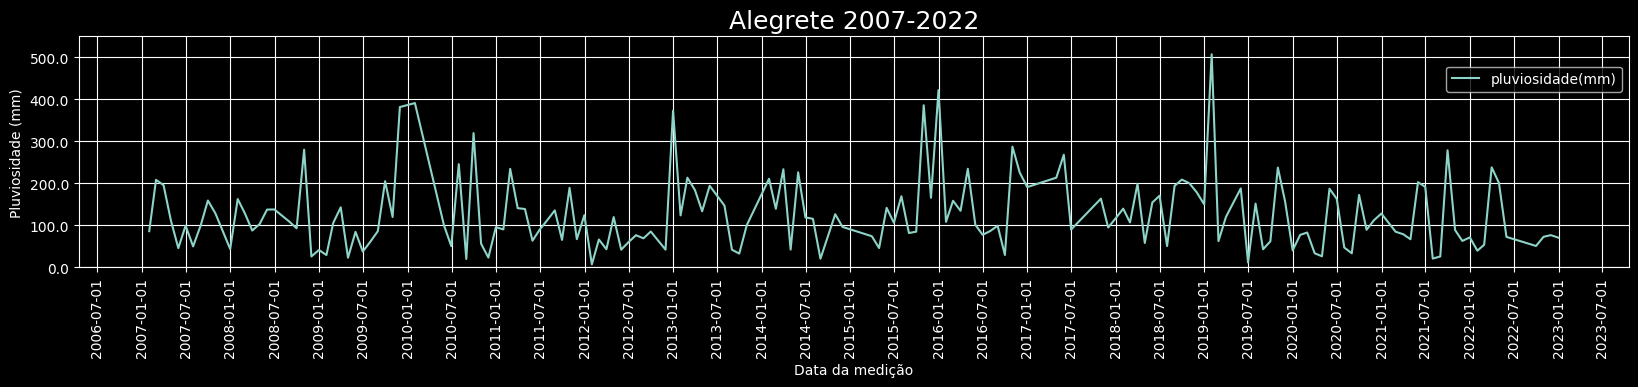

In [54]:
months = mdates.MonthLocator([1,7])
months_fmt = mdates.DateFormatter("%Y-%m-%d")


plt.figure(figsize=(20,3))
axis = sns.lineplot(y="chuva", x=alegrete.index, data=alegrete, label="pluviosidade(mm)") #CHUVA
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))


#sns.lineplot(y="temperatura", x=alegrete.index, data=alegrete, label="Temperatura(C)") #TEMPERATURA
plt.xticks(rotation='vertical')

plt.grid()
plt.title("Alegrete 2007-2022", loc="center", fontsize=18)
plt.xlabel("Data da medição")
plt.ylabel("Pluviosidade (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))


#Determina a frequência máxima(major locator)
#Determina o formato de data( ano - mes - dia)
axis.xaxis.set_major_locator(months)
axis.xaxis.set_major_formatter(months_fmt)

plt.ylim(0, 550)


plt.show()


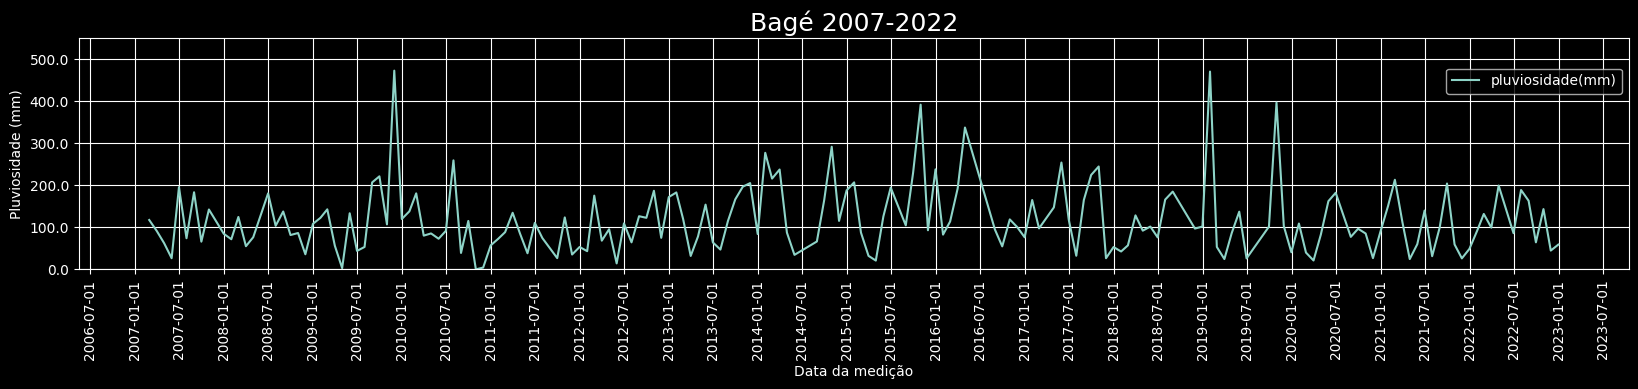

In [55]:


plt.figure(figsize=(20,3))
axis = sns.lineplot(y="chuva", x=bage.index, data=bage, label="pluviosidade(mm)") #CHUVA
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))


#sns.lineplot(y="temperatura", x=bage.index, data=bage, label="Temperatura(C)") #TEMPERATURA
plt.xticks(rotation='vertical')

plt.grid()
plt.title("Bagé 2007-2022", loc="center", fontsize=18)
plt.xlabel("Data da medição")
plt.ylabel("Pluviosidade (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))


axis.xaxis.set_major_locator(months)
axis.xaxis.set_major_formatter(months_fmt)

plt.ylim(0, 550)



plt.show()


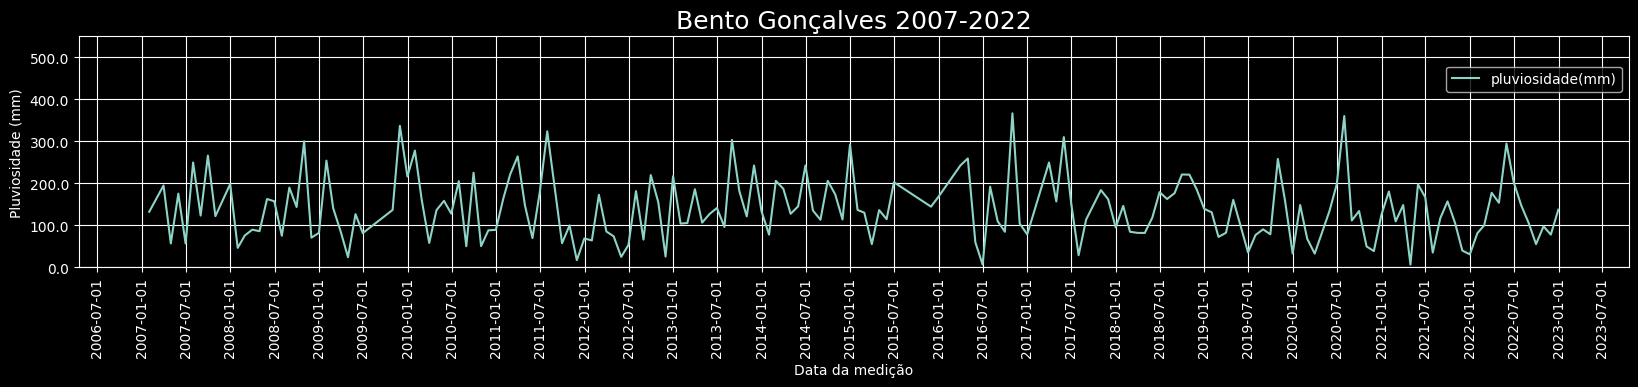

In [56]:


plt.figure(figsize=(20,3))
axis = sns.lineplot(y="chuva", x=bento.index, data=bento, label="pluviosidade(mm)") #CHUVA
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))


#sns.lineplot(y="temperatura", x=bento.index, data=bento, label="Temperatura(C)") #TEMPERATURA
plt.xticks(rotation='vertical')

plt.grid()
plt.title("Bento Gonçalves 2007-2022", loc="center", fontsize=18)
plt.xlabel("Data da medição")
plt.ylabel("Pluviosidade (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))


axis.xaxis.set_major_locator(months)
axis.xaxis.set_major_formatter(months_fmt)

plt.ylim(0, 550)



plt.show()


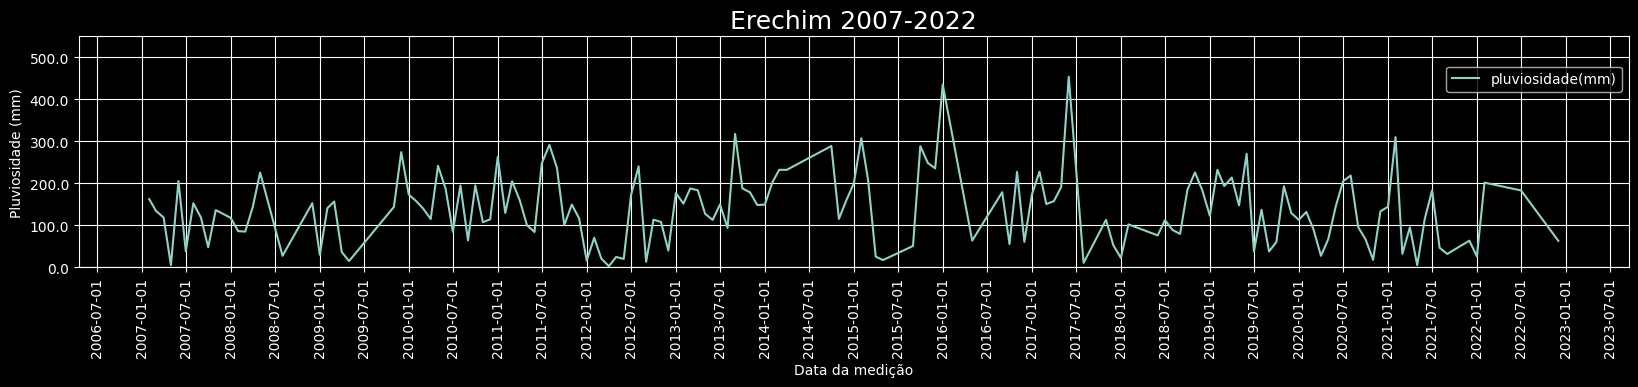

In [57]:


plt.figure(figsize=(20,3))
axis = sns.lineplot(y="chuva", x=erechim.index, data=erechim, label="pluviosidade(mm)") #CHUVA
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))


#sns.lineplot(y="temperatura", x=erechim.index, data=erechim, label="Temperatura(C)") #TEMPERATURA
plt.xticks(rotation='vertical')

plt.grid()
plt.title("Erechim 2007-2022", loc="center", fontsize=18)
plt.xlabel("Data da medição")
plt.ylabel("Pluviosidade (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))


axis.xaxis.set_major_locator(months)
axis.xaxis.set_major_formatter(months_fmt)

plt.ylim(0, 550)



plt.show()


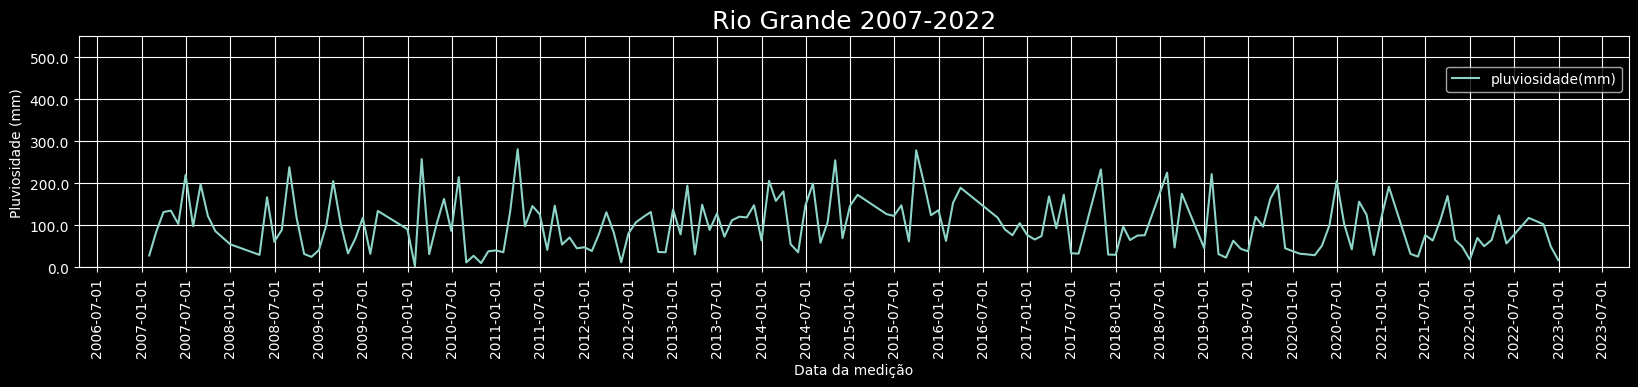

In [58]:


plt.figure(figsize=(20,3))
axis = sns.lineplot(y="chuva", x=rio_grande.index, data=rio_grande, label="pluviosidade(mm)") #CHUVA
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))


#sns.lineplot(y="temperatura", x=rio_grande.index, data=rio_grande, label="Temperatura(C)") #TEMPERATURA
plt.xticks(rotation='vertical')

plt.grid()
plt.title("Rio Grande 2007-2022", loc="center", fontsize=18)
plt.xlabel("Data da medição")
plt.ylabel("Pluviosidade (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))


axis.xaxis.set_major_locator(months)
axis.xaxis.set_major_formatter(months_fmt)

plt.ylim(0, 550)



plt.show()


In [59]:
rio_grande["temperatura"].max() #apliquei esse comando para todas as estações para completar
#a tabela que está no artigo; chuva e temperatura
#std(), mean() também

25.246131

In [60]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(bage['chuva'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

print(outliers)

#esse código, com algumas adaptações, tive ajuda do link:
#https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/


number of outliers: 5
max outlier value: 473.4
min outlier value: 338.0
data
2009-11-30   473.40
2015-10-31   392.40
2016-04-30   338.00
2019-01-31   471.20
2019-10-31   397.40
Name: chuva, dtype: float64


In [61]:
#Printando os outliers de cada região:
outliers = find_outliers_IQR(alegrete['chuva'])
print('Outliers de Alegrete(mm): '+ str(outliers.max()))
print("As datas são: ")
print(outliers)

outliers = find_outliers_IQR(erechim['chuva'])
print('Outliers de Erechim(mm): '+ str(outliers.max()))
print("As datas são: ")
print(outliers)

outliers = find_outliers_IQR(bento['chuva'])
print('Outliers de Bento Gonçalves(mm): '+ str(outliers.max()))
print("As datas são: ")
print(outliers)

outliers = find_outliers_IQR(rio_grande['chuva'])
print('Outliers de Rio Grande(mm): '+ str(outliers.max()))
print("As datas são: ")
print(outliers)

outliers = find_outliers_IQR(bage['chuva'])
print('Outliers de Bagé(mm): '+ str(outliers.max()))
print("As datas são: ")
print(outliers)


Outliers de Alegrete(mm): 507.6
As datas são: 
data
2009-11-30   382.00
2010-01-31   391.40
2012-12-31   373.40
2015-10-31   386.20
2015-12-31   422.20
2019-01-31   507.60
Name: chuva, dtype: float64
Outliers de Erechim(mm): 454.0
As datas são: 
data
2015-12-31   435.60
2017-05-31   454.00
Name: chuva, dtype: float64
Outliers de Bento Gonçalves(mm): 367.0
As datas são: 
data
2009-11-30   337.20
2016-10-31   367.00
2020-07-31   360.60
Name: chuva, dtype: float64
Outliers de Rio Grande(mm): 281.4
As datas são: 
data
2011-03-31   281.40
2015-09-30   278.80
Name: chuva, dtype: float64
Outliers de Bagé(mm): 473.4
As datas são: 
data
2009-11-30   473.40
2015-10-31   392.40
2016-04-30   338.00
2019-01-31   471.20
2019-10-31   397.40
Name: chuva, dtype: float64
